In [1]:
import json
import os

def py_to_json(py_file_path, output_dir="json_output"):
    # 创建输出目录
    os.makedirs(output_dir, exist_ok=True)

    # 创建一个独立命名空间执行 py 文件
    namespace = {}
    with open(py_file_path, "r", encoding="utf-8") as f:
        code = f.read()
        exec(code, namespace)

    # 遍历变量，找到所有 list 类型
    for var_name, value in namespace.items():
        if isinstance(value, list):
            json_path = os.path.join(output_dir, f"{var_name}.json")
            with open(json_path, "w", encoding="utf-8") as jf:
                json.dump(value, jf, indent=4, ensure_ascii=False)
            print(f"✔ Saved {var_name}.json")

    print("\n🎉 All list variables have been exported to JSON!")


# 示例调用
if __name__ == "__main__":
    py_to_json("crt.py")   # ← 换成你的 py 文件路径


✔ Saved crt1.json
✔ Saved crt_not_hostile.json
✔ Saved crt2.json
✔ Saved crt2_not_hostile.json
✔ Saved crt3.json
✔ Saved crt3_not_hostile.json
✔ Saved si.json

🎉 All list variables have been exported to JSON!


In [8]:
import os
import json

def count_brace_pairs_in_text(text: str) -> int:
    """统计文本中 {} 的成对数量"""
    left = text.count("{")
    right = text.count("}")
    return min(left, right)

def count_brace_pairs_in_json_files(folder="."):
    total_pairs = 0
    details = {}

    for filename in os.listdir(folder):
        if filename.endswith(".json"):
            path = os.path.join(folder, filename)
            try:
                with open(path, "r", encoding="utf-8") as f:
                    content = f.read()
                pairs = count_brace_pairs_in_text(content)
                details[filename] = pairs
                total_pairs += pairs
            except Exception as e:
                details[filename] = f"读取失败: {e}"

    return total_pairs, details


if __name__ == "__main__":
    total, detail = count_brace_pairs_in_json_files(".")
    print("=== 每个 JSON 文件的 {} 括号对数量 ===")
    for k, v in detail.items():
        print(f"{k}: {v}")
    print("\n=== 总括号对数量 ===")
    print(total)


=== 每个 JSON 文件的 {} 括号对数量 ===

=== 总括号对数量 ===
0


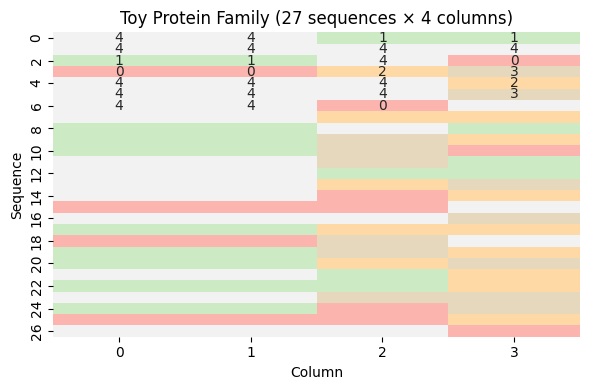

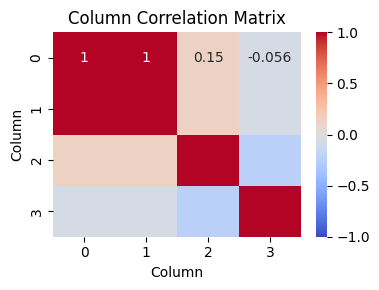

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Toy data: 27 sequences × 4 columns, amino acids A-E encoded as 0-4
# 生成符合描述的Toy数据
data = np.zeros((27, 4), dtype=int)

# Columns 1-2 correlated (mostly 'E' = 4)
for i in range(27):
    col_val = np.random.choice([4, 0, 1], p=[0.6, 0.2, 0.2])  # E dominant
    data[i, 0] = col_val
    data[i, 1] = col_val  # correlated

# Columns 3-4 correlated with pattern
for i in range(27):
    val3 = np.random.choice([0,1,2,3,4], p=[0.2,0.2,0.2,0.2,0.2])
    data[i, 2] = val3
    if val3 == 1:  # B -> A/B/C
        data[i, 3] = np.random.choice([0,1,2])
    elif val3 == 2:  # C -> B/C/D
        data[i, 3] = np.random.choice([1,2,3])
    else:
        data[i, 3] = np.random.randint(0,5)

# Heatmap for toy data
plt.figure(figsize=(6,4))
sns.heatmap(data, annot=True, fmt='d', cmap='Pastel1', cbar=False)
plt.xlabel('Column')
plt.ylabel('Sequence')
plt.title('Toy Protein Family (27 sequences × 4 columns)')
plt.tight_layout()
plt.savefig('toy_data.png', dpi=300)
plt.show()

# Correlation matrix between columns
plt.figure(figsize=(4,3))
corr = np.corrcoef(data.T)
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Column Correlation Matrix')
plt.xlabel('Column')
plt.ylabel('Column')
plt.tight_layout()
plt.savefig('toy_corr.png', dpi=300)
plt.show()


In [1]:
import types
import crt  

def analyze_datasets(module):
    """
    遍历模块中的所有列表变量，统计题目数量并按类别汇总
    """
    stats = []
    
    # 获取模块中所有的变量名和值
    for name, value in vars(module).items():
        # 过滤掉隐藏属性和非列表类型
        if not name.startswith("__") and isinstance(value, list):
            count = len(value)
            
            # 尝试从变量名或内容推断属性 (对应你表格中的分类)
            category = "Unknown"
            prop = "N/A"
            
            if 'crt' in name.lower():
                category = "CRT variants"
                if 'hostile' in name.lower():
                    prop = "Adversarial phrasing; High trap density"
                else:
                    prop = "Intuitive lures; Requires calculation"
            elif 'si' in name.lower() or 'semantic' in name.lower():
                category = "Semantic Reasoning"
                prop = "Open-ended; Requires conceptual alignment"
                
            stats.append({
                "Variable": name,
                "Count": count,
                "Category": category,
                "Property": prop
            })
    
    return stats

# 执行分析
results = analyze_datasets(crt)

# 打印符合 LaTeX 表格格式的数据预览
print(f"{'Variable':<20} | {'Count':<6} | {'Cognitive Property'}")
print("-" * 60)
total_stimuli = 0
for r in results:
    print(f"{r['Variable']:<20} | {r['Count']:<6} | {r['Property']}")
    total_stimuli += r['Count']

print(f"\nTotal Stimuli in Benchmark: {total_stimuli}")

Variable             | Count  | Cognitive Property
------------------------------------------------------------
crt1                 | 50     | Intuitive lures; Requires calculation
crt_not_hostile      | 50     | Adversarial phrasing; High trap density
crt2                 | 50     | Intuitive lures; Requires calculation
crt2_not_hostile     | 50     | Adversarial phrasing; High trap density
crt3                 | 50     | Intuitive lures; Requires calculation
crt3_not_hostile     | 50     | Adversarial phrasing; High trap density
si                   | 50     | Open-ended; Requires conceptual alignment

Total Stimuli in Benchmark: 350


In [1]:
import json

input_file = "crt_not_hostile.json"
output_file = "crt_not_hostile_swapped.json"

with open(input_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# data 是一个列表，每个元素是一个 dict
for item in data:
    if "intuitive" in item and "correct" in item:
        item["intuitive"], item["correct"] = item["correct"], item["intuitive"]

with open(output_file, "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

print("已完成字段互换，输出文件：", output_file)


已完成字段互换，输出文件： crt_not_hostile_swapped.json


In [3]:
import requests

API_KEY = "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"   # 自己填（建议跑完就换）

URL = "https://openrouter.ai/api/v1/models"

HEADERS = {
    "Authorization": f"Bearer {API_KEY}"
}

MODEL_MAP = {
    "meta-llama/llama-3.2-3b-instruct": "llama_3_2_3b",
    "qwen/qwen-2.5-7b-instruct": "qwen_2_5_7b",
    "mistralai/ministral-8b-2512": "mistral_8b",
    "google/gemma-2-9b-it": "gemma_2_9b",
    "qwen/qwen3-32b": "qwen_32b",
    "deepseek/deepseek-chat": "deepseek_v3",
}

r = requests.get(URL, headers=HEADERS, timeout=20)
r.raise_for_status()

models = r.json()["data"]

PRICING = {}

for m in models:
    mid = m["id"]
    if mid not in MODEL_MAP:
        continue

    p = m.get("pricing", {})

    in_token = float(p.get("prompt", 0))
    out_token = float(p.get("completion", 0))

    # 转成 USD / 1M tokens
    PRICING[MODEL_MAP[mid]] = {
        "in": round(in_token * 1_000_000, 4),
        "out": round(out_token * 1_000_000, 4),
    }

print("PRICING = {")
for k, v in PRICING.items():
    print(f'    "{k}": {v},')
print("}")


PRICING = {
    "mistral_8b": {'in': 0.15, 'out': 0.15},
    "qwen_32b": {'in': 0.08, 'out': 0.24},
    "deepseek_v3": {'in': 0.3, 'out': 1.2},
    "qwen_2_5_7b": {'in': 0.04, 'out': 0.1},
    "llama_3_2_3b": {'in': 0.02, 'out': 0.02},
    "gemma_2_9b": {'in': 0.03, 'out': 0.09},
}
